In [75]:
import numpy as np
import matplotlib.pyplot as plt

## Create a population

In [4]:
def create_population(no_of_people, no_of_groups, low = 0, high = 100):
    population = np.random.randint(low=low, high=high, size = (no_of_groups,no_of_people))
    return population 

## Create a fitness function

In [7]:
def fitness(group, target):
    '''
    We sum the people in the group and subtract it from the target. [Take absolute value]
    '''
    
    summation = np.sum(group)
    fitness = abs(target-summation)
    return fitness

## Create a population fitness function

In [26]:
def population_fitness(population, target):
    '''
    Calculating the fitness for the whole population.
    '''
    
    summation = np.sum(population,axis = 1)
    average = np.mean(summation)
    fitness = abs(target-average)
    return fitness

## Mutation step

In [40]:
def mutation(population, mutate = 0.1):
    for group in population:
        if mutate > np.random.rand():
            position = np.random.randint(len(group))
            group[position] = np.random.randint(np.min(group),np.max(group))
    return population

## Breeding Step

In [73]:
def breeding(parents, total_size):
    parents_length = len(parents)
    desired_size = total_size - parents_length
    children = []
    while len(children)<desired_size:
        father = np.random.randint(0,parents_length-1)
        mother = np.random.randint(0,parents_length-1)
        if father!=mother:
            father = parents[father]
            mother = parents[mother]
            half_point = len(father)//2
            child = np.concatenate([father[:half_point],mother[half_point:]])
            children.append(child)
    children = np.array(children)
    parents = np.vstack((parents,children))
    return parents    

## Optimization step

In [65]:
def take_first(elem):
    return elem[0]

def optimize(population, target, retain = 0.2, mutate = 0.1):
    graded = [ (fitness(x, target), x) for x in population]
    graded = [ x[1] for x in sorted(graded,key=take_first)]
    retain_length = int(len(graded)*retain)
    parents = graded[:retain_length]
    
    #mutation step
    parents = mutation(parents, mutate)
    
    #breeding step
    parents = breeding(parents, len(population))    
    
    return np.array(parents)

Text(0, 0.5, 'Fitness of population')

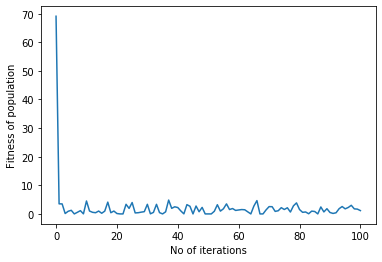

In [80]:
target = 371
p_count = 100
i_length = 6
i_min = 0
i_max = 100
iterations = 100
p = create_population(i_length, p_count, i_min, i_max)
fitness_history = [population_fitness(p, target),]

for i in range(iterations):
    p = optimize(p, target)
    fitness_history.append(population_fitness(p, target))
plt.plot(np.arange(iterations+1),fitness_history)
plt.xlabel('No of iterations')
plt.ylabel('Fitness of population')

### References
1. https://lethain.com/genetic-algorithms-cool-name-damn-simple/
2. https://blog.coast.ai/lets-evolve-a-neural-network-with-a-genetic-algorithm-code-included-8809bece164
3. https://medium.com/cindicator/genetic-algorithms-and-hyperparameters-weekend-of-a-data-scientist-8f069669015e